## Analiza brezposelnosti in prostih delovnih mest v Sloveniji

Naložimo podatke. Tip podatkov = px. To storimo z pomočjo knjižnice pyaxis. Za sam projekt, bomo uporabljali še pandas in matplotlib, zato importamo še ta dva. Podatke potem obdelamo z pyaxis.parse in podamo še encoding. Utf-8 ni delal, latin1 ni primeren za naše podatke, zato sem se na koncu odločil za cp1250. 

In [9]:
from pyaxis import pyaxis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# nalozimo podatke
parsed = pyaxis.parse('podatki/brezaposleneCetrtletno.PX', encoding='cp1250') 
df = parsed['DATA']

Multilingual PX file


Za prikaz razlik med nezaposlenostjo moških in žensk potrebujemo prvo ustrezne podatke. Izberemo regijo Slovenija, skupno starostno skupino, meritev v procentih in spol. Podatke dobimo razdeljene glede na četrtine let podane v formatu 2008Q1 naprimer. Iz tega razloga jih potem pretvorimo v berljivo obliko z PeriodIndex. Za vsak slučaj se prepričamo, da nimamo string podatkov in na koncu izrišemo graf. 

Multilingual PX file


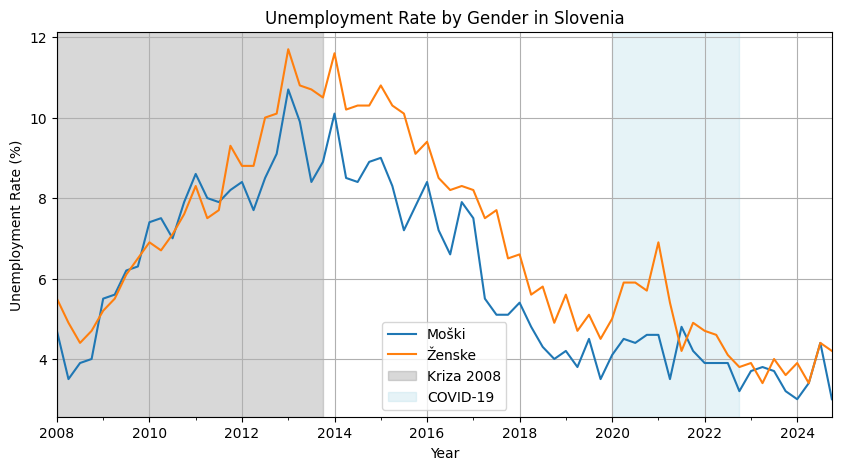

In [11]:
parsed2 = pyaxis.parse('podatki/vsi.px', encoding='cp1250')
df2 = parsed2['DATA']

df2_unemployment = df2[
    (df2['KOHEZIJSKA REGIJA'] == "SLOVENIJA") &
    (df2["STAROSTNA SKUPINA"] == "Starostna skupina - SKUPAJ") &
    (df2["MERITVE"] == "Stopnja brezposelnosti (v %)") &
    (df2["SPOL"].isin(['Moški', 'Ženske']))
].copy()

df2_unemployment['ČETRTLETJE'] = pd.PeriodIndex(df2_unemployment['ČETRTLETJE'], freq='Q').to_timestamp()
df2_unemployment['DATA'] = pd.to_numeric(df2_unemployment['DATA'], errors='coerce')

pivot = df2_unemployment.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')


# pivot.plot(title='Unemployment Rate by Gender in Slovenia', figsize=(10, 5))
# plt.ylabel('Unemployment Rate (%)')
# plt.xlabel('Year')
# plt.grid(True)
# plt.show()

pivot.plot(title='Unemployment Rate by Gender in Slovenia', figsize=(10, 5))

# Obarvajmo obdobja
plt.axvspan('2008-01-01', '2013-12-31', color='gray', alpha=0.3, label='Kriza 2008')
plt.axvspan('2020-01-01', '2022-12-31', color='lightblue', alpha=0.3, label='COVID-19')

plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.grid(True)

# Dodajmo legendo
plt.legend()

plt.show()

Dobljeni rezulati, se zdijo smiselni glede na krizo, ki se je zgodila okoli leta 2010 in manjša porast brezposelnosti
okoli leta 2020 - 2022 sklepam, da zaradi covida. 

In [12]:
df.columns

Index(['KOHEZIJSKA REGIJA', 'BREZPOSELNE OSEBE', 'SPOL', 'MERITVE',
       'ČETRTLETJE', 'DATA'],
      dtype='object')

Povprečno število brezposelnih med leti 2008-2024 v Zahodni Sloveniji (mera: število v 1000): 
SPOL
Spol - SKUPAJ    27.367647
dtype: float64
Povprečno število brezposelnih med leti 2008-2024 v Vzhodni Sloveniji (mera: število v 1000): 
SPOL
Spol - SKUPAJ    38.044118
dtype: float64


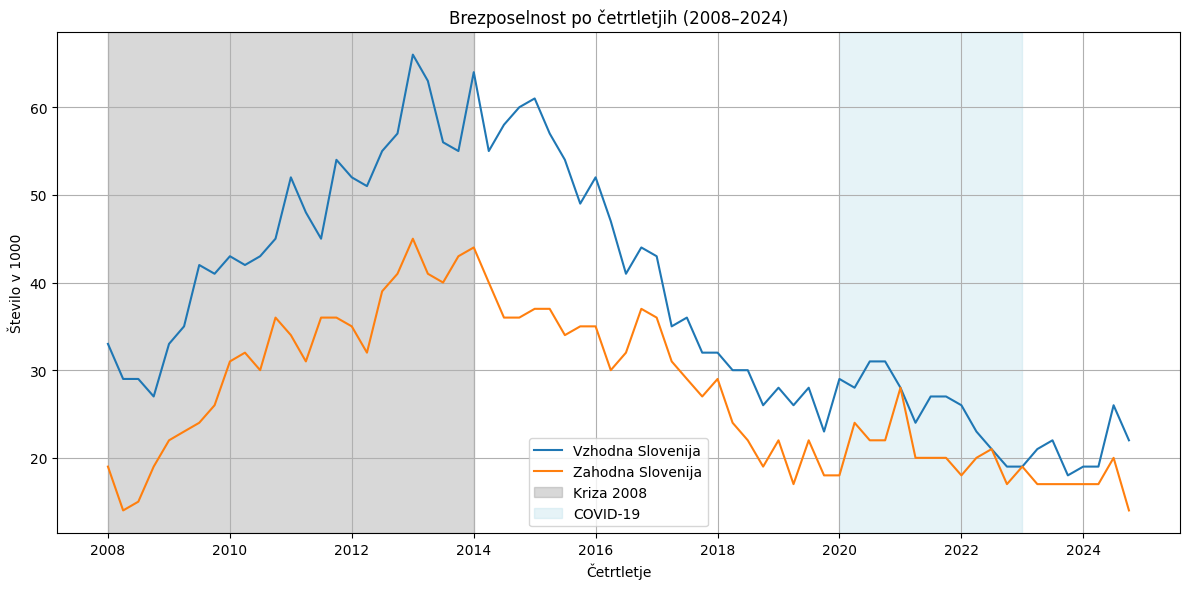

In [13]:
df_vzhod = df[
        (df['KOHEZIJSKA REGIJA'] == 'Vzhodna Slovenija') &
        (df['BREZPOSELNE OSEBE'] == 'Brezposelni - SKUPAJ') &
        (df['MERITVE'] == 'Število v 1000') &
        (df['SPOL'] == 'Spol - SKUPAJ')

].copy()

df_vzhod['ČETRTLETJE'] = pd.PeriodIndex(df_vzhod['ČETRTLETJE'], freq='Q').to_timestamp()
df_vzhod['DATA'] = pd.to_numeric(df_vzhod['DATA'], errors='coerce')
pivot_vzhod = df_vzhod.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')



df_zahod = df[
        (df['KOHEZIJSKA REGIJA'] == 'Zahodna Slovenija') &
        (df['BREZPOSELNE OSEBE'] == 'Brezposelni - SKUPAJ') &
        (df['MERITVE'] == 'Število v 1000') &
        (df['SPOL'] == 'Spol - SKUPAJ')
].copy()

df_zahod['ČETRTLETJE'] = pd.PeriodIndex(df_zahod['ČETRTLETJE'], freq='Q').to_timestamp()
df_zahod['DATA'] = pd.to_numeric(df_zahod['DATA'], errors='coerce')
pivot_zahod = df_zahod.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')

print("Povprečno število brezposelnih med leti 2008-2024 v Zahodni Sloveniji (mera: število v 1000): ")
print(pivot_zahod.mean())

print("Povprečno število brezposelnih med leti 2008-2024 v Vzhodni Sloveniji (mera: število v 1000): ")
print(pivot_vzhod.mean())

plt.figure(figsize=(12, 6))

plt.plot(pivot_vzhod.index, pivot_vzhod, label='Vzhodna Slovenija')
plt.plot(pivot_zahod.index, pivot_zahod, label='Zahodna Slovenija')
plt.title('Brezposelnost po četrtletjih (2008–2024)')
plt.ylabel('Število v 1000')
plt.xlabel('Četrtletje')
plt.axvspan('2008-01-01', '2013-12-31', color='gray', alpha=0.3, label='Kriza 2008')
plt.axvspan('2020-01-01', '2022-12-31', color='lightblue', alpha=0.3, label='COVID-19')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 


In [14]:
print(df.head())

  KOHEZIJSKA REGIJA     BREZPOSELNE OSEBE           SPOL         MERITVE  \
0         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   
1         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   
2         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   
3         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   
4         SLOVENIJA  Brezposelni - SKUPAJ  Spol - SKUPAJ  Število v 1000   

  ČETRTLETJE DATA  
0     2008Q1   52  
1     2008Q2   43  
2     2008Q3   44  
3     2008Q4   45  
4     2009Q1   55  


Sedaj bi si pogledali še število prostih mest v teh obdobjih. Je število prostih delovnih mest skladno z ravnjo brezposelnosti ? Kje je kje ni ? 

In [15]:
# nalozimo podatke
parsed_delovnamesta = pyaxis.parse('podatki/delovnaMestaCetrtletno.PX', encoding='cp1250') 
delovna_df = parsed_delovnamesta['DATA']

Multilingual PX file


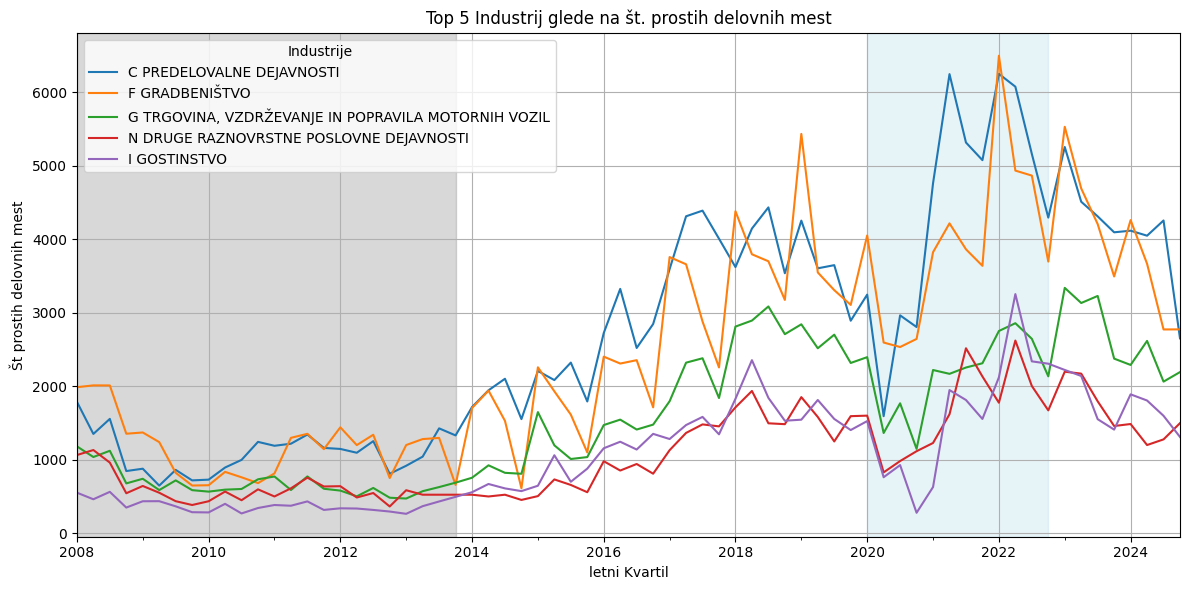

In [16]:
vac_by_industry = delovna_df[
    (delovna_df["MERITVE"] == "Število prostih delovnih mest  - SKUPAJ") &
    (delovna_df["SKD DEJAVNOST"] != "SKD Dejavnost - SKUPAJ [B do S]")
].copy()

vac_by_industry['ČETRTLETJE'] = pd.PeriodIndex(vac_by_industry['ČETRTLETJE'], freq='Q').to_timestamp()

vac_by_industry["DATA"] = pd.to_numeric(vac_by_industry["DATA"], errors="coerce")

vacancy_pivot = vac_by_industry.pivot_table(
    index="ČETRTLETJE",
    columns="SKD DEJAVNOST",
    values="DATA"
)

#vacancy_pivot
top_industries = vacancy_pivot.mean().sort_values(ascending=False).head(5).index

vacancy_pivot[top_industries].plot(figsize=(12,6), title="Top 5 Industrij glede na št. prostih delovnih mest")
plt.ylabel("Št prostih delovnih mest")
plt.xlabel("letni Kvartil")
plt.grid(True)
plt.legend(title="Industrije")
plt.axvspan('2008-01-01', '2013-12-31', color='gray', alpha=0.3, label='Kriza 2008')
plt.axvspan('2020-01-01', '2022-12-31', color='lightblue', alpha=0.3, label='COVID-19')
plt.tight_layout()
plt.show()


Multilingual PX file
SPOL        Spol - SKUPAJ
ČETRTLETJE               
2008-01-01            5.1
2008-04-01            4.2
2008-07-01            4.1
2008-10-01            4.3
2009-01-01            5.4
...                   ...
2023-10-01            3.4
2024-01-01            3.4
2024-04-01            3.4
2024-07-01            4.4
2024-10-01            3.5

[68 rows x 1 columns]
SKD DEJAVNOST  B RUDARSTVO  C PREDELOVALNE DEJAVNOSTI  \
ČETRTLETJE                                              
2008-01-01          3639.0                   213496.0   
2008-04-01          3569.0                   213478.0   
2008-07-01          3499.0                   211647.0   
2008-10-01          3423.0                   208497.0   
2009-01-01          3355.0                   198980.0   
...                    ...                        ...   
2023-10-01          2146.0                   199781.0   
2024-01-01          2113.0                   198466.0   
2024-04-01          2092.0                   197

C:\Users\Zan\AppData\Local\Temp\ipykernel_9356\516202342.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


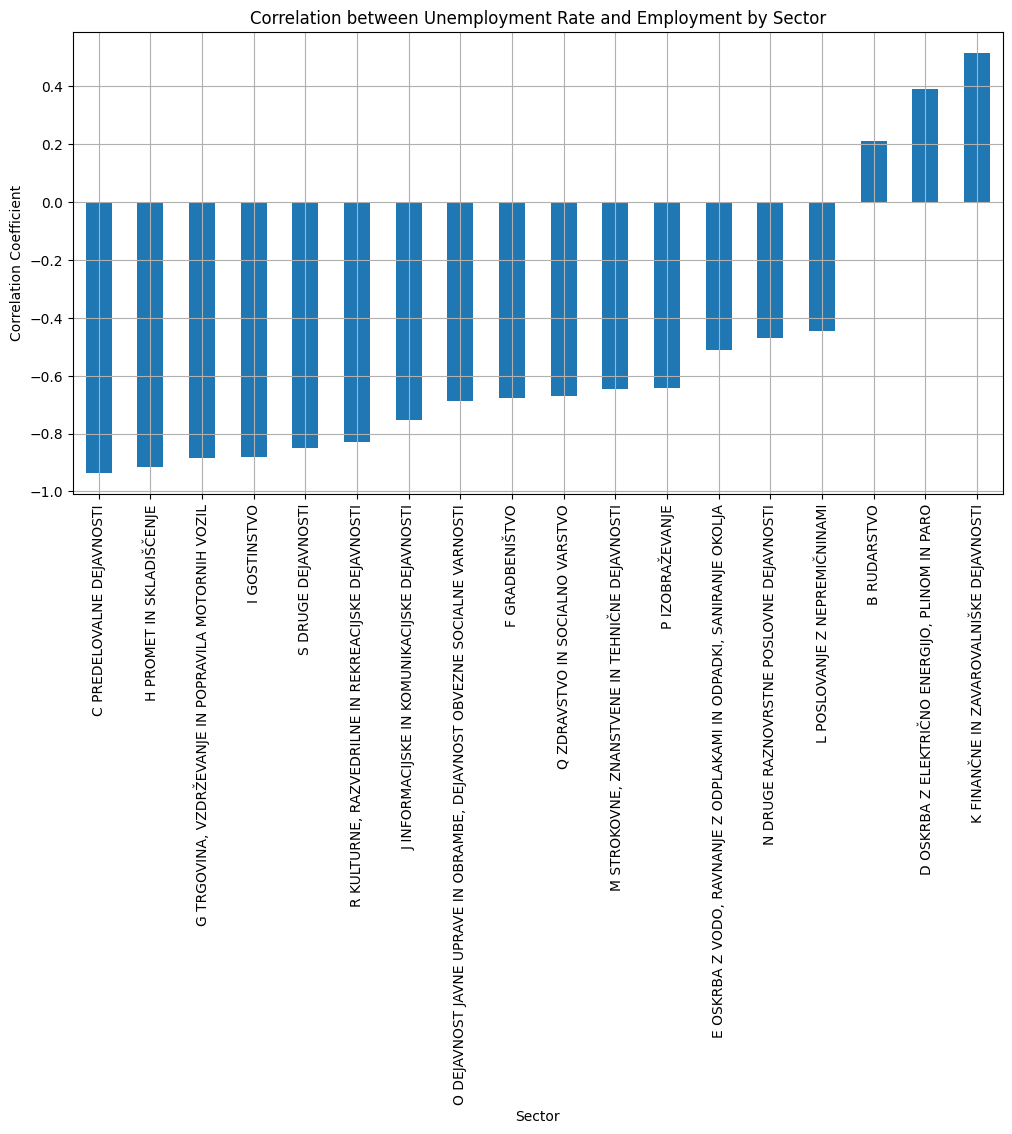

In [17]:
vsa_delovna = delovna_df[
    (delovna_df["MERITVE"] == 'Število zasedenih delovnih mest - SKUPAJ') &
    (delovna_df["SKD DEJAVNOST"] != "SKD Dejavnost - SKUPAJ [B do S]")
].copy()

vsa_delovna['ČETRTLETJE'] = pd.PeriodIndex(vsa_delovna['ČETRTLETJE'], freq='Q').to_timestamp()

vsa_delovna["DATA"] = pd.to_numeric(vsa_delovna["DATA"], errors="coerce")

delovna_pivot = vsa_delovna.pivot_table(
    index="ČETRTLETJE",
    columns="SKD DEJAVNOST",
    values="DATA"
)

parsed2 = pyaxis.parse('podatki/vsi.px', encoding='cp1250')
df2 = parsed2['DATA']

df2_unemployment = df2[
    (df2['KOHEZIJSKA REGIJA'] == "SLOVENIJA") &
    (df2["STAROSTNA SKUPINA"] == "Starostna skupina - SKUPAJ") &
    (df2["MERITVE"] == "Stopnja brezposelnosti (v %)") &
    (df2["SPOL"] == "Spol - SKUPAJ")
].copy()



df2_unemployment['ČETRTLETJE'] = pd.PeriodIndex(df2_unemployment['ČETRTLETJE'], freq='Q').to_timestamp()
df2_unemployment['DATA'] = pd.to_numeric(df2_unemployment['DATA'], errors='coerce')

pivot = df2_unemployment.pivot_table(index='ČETRTLETJE', columns='SPOL', values='DATA')


print(pivot)
print(delovna_pivot)


aligned_df = pd.concat([pivot, delovna_pivot], axis=1, join='inner')

# Calculate correlations between unemployment rate and employment in each sector
correlations = aligned_df.corr().iloc[0, 1:]  # Assuming unemployment rate is the first column

# Sort correlations to find sectors most affected
sorted_correlations = correlations.sort_values()

print(sorted_correlations)

# Plot the correlations
sorted_correlations.plot(kind='bar', figsize=(12, 6), title='Correlation between Unemployment Rate and Employment by Sector')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Sector')
plt.grid(True)
plt.tight_layout()
plt.show()



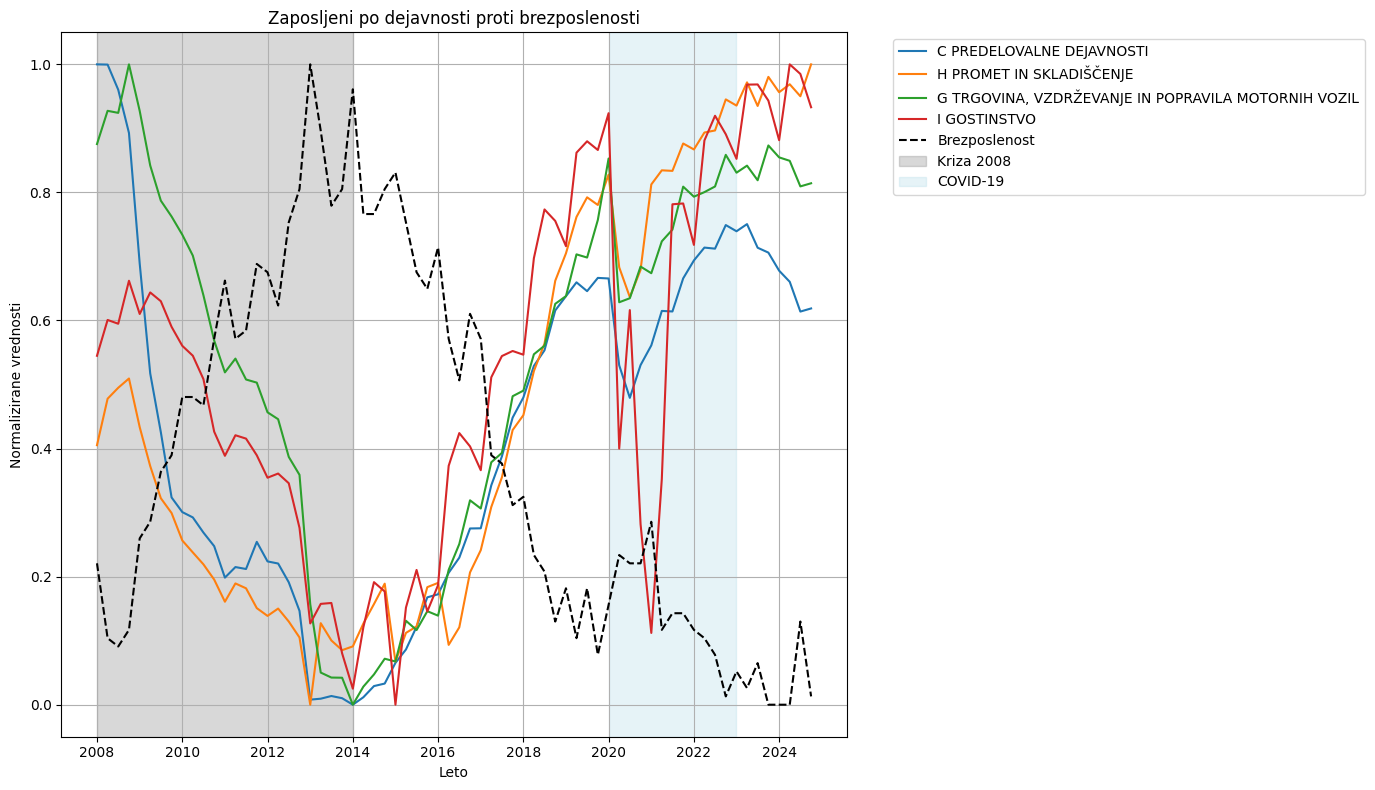

In [18]:
employment_df_normalized = delovna_pivot.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

unemployment_rate_normalized = (pivot['Spol - SKUPAJ'] - pivot['Spol - SKUPAJ'].min()) / (pivot['Spol - SKUPAJ'].max() - pivot['Spol - SKUPAJ'].min())

plt.figure(figsize=(14, 8))

for sector in sorted_correlations.head(4).index:
    plt.plot(employment_df_normalized.index, employment_df_normalized[sector], label=sector)

plt.plot(unemployment_rate_normalized.index, unemployment_rate_normalized, label='Brezposlenost', linestyle='--', color='black')

plt.title('Zaposljeni po dejavnosti proti brezposlenosti')
plt.xlabel('Leto')
plt.ylabel('Normalizirane vrednosti')
plt.axvspan('2008-01-01', '2013-12-31', color='gray', alpha=0.3, label='Kriza 2008')
plt.axvspan('2020-01-01', '2022-12-31', color='lightblue', alpha=0.3, label='COVID-19')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

  Cetrtletje Unemployment Rate (%)
0     2008Q1                   5.1
1     2008Q2                   4.2
2     2008Q3                   4.1
3     2008Q4                   4.3
4     2009Q1                   5.4
  Cetrtletje Prosta delovna mesta (%)
0     2008Q1                      1.2
1     2008Q2                        1
2     2008Q3                      1.1
3     2008Q4                      0.8
4     2009Q1                      0.8
   Cetrtletje  Vrednost
0      2008Q1       6.5
1      2008Q2       6.6
2      2008Q3       6.5
3      2008Q4       6.0
4      2009Q1       1.8
..        ...       ...
63     2023Q4       7.8
64     2024Q1       3.4
65     2024Q2       3.1
66     2024Q3       2.4
67     2024Q4       2.0

[68 rows x 2 columns]
   Cetrtletje  Vrednost
0      2008Q1   1334.93
1      2008Q2   1359.72
2      2008Q3   1392.56
3      2008Q4   1477.34
4      2009Q1   1407.77
..        ...       ...
63     2023Q4   2328.73
64     2024Q1   2310.01
65     2024Q2   2350.99
66     2024

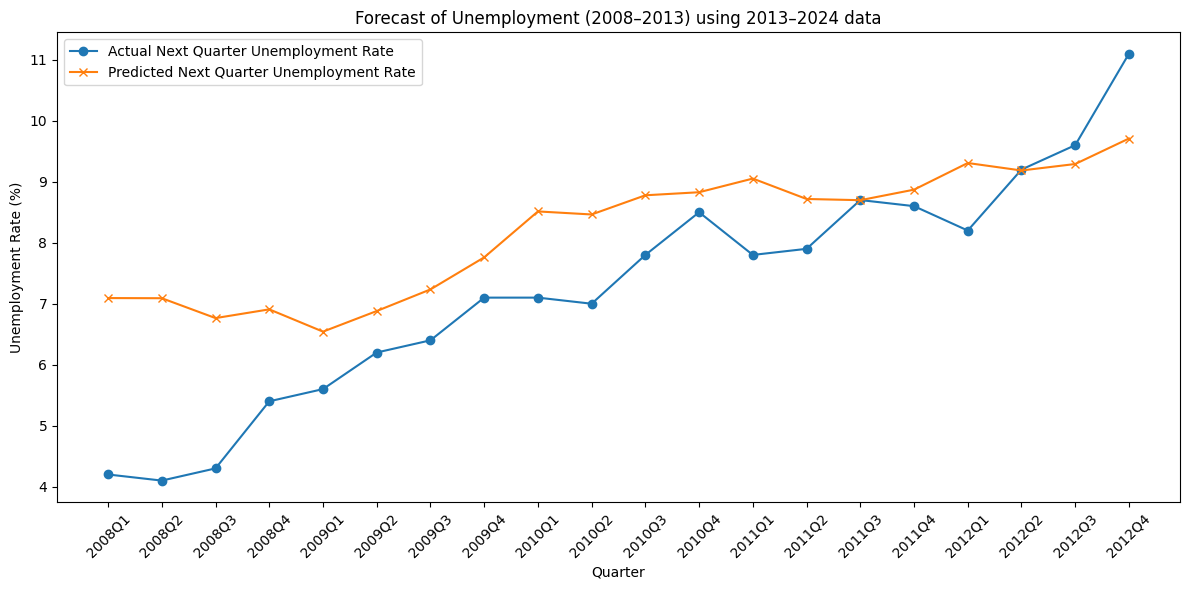

Prediction for Middle Period (2013–2019) RMSE: 0.812
Prediction for Middle Period (2013–2019) R^2: 0.837


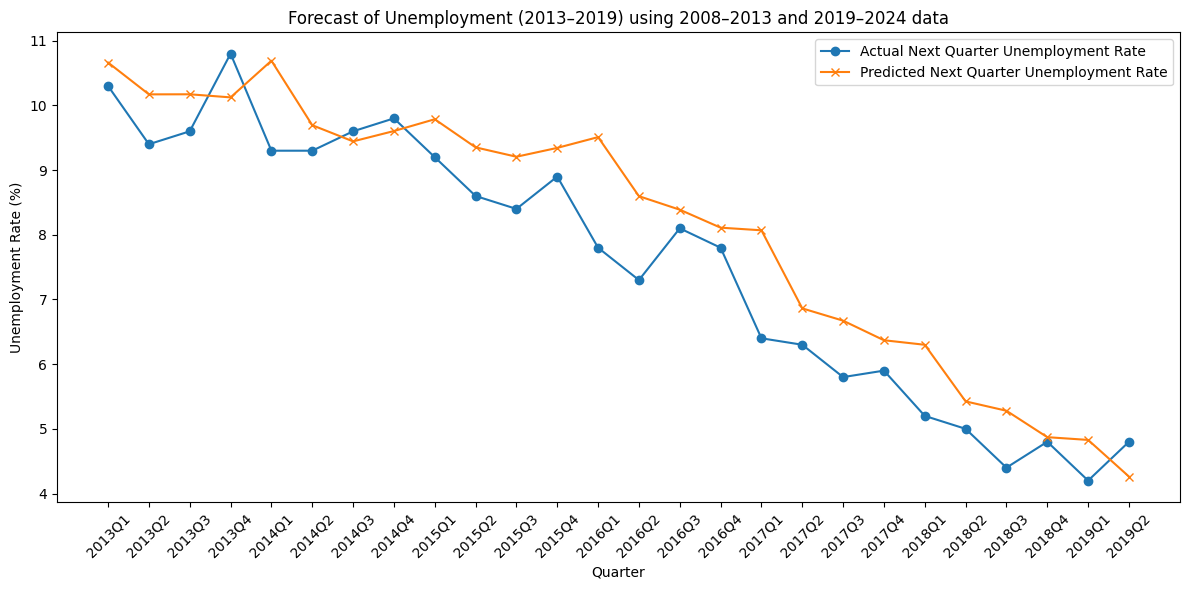

Rolling Forecast RMSE: 0.834
Rolling Forecast R^2: -0.706


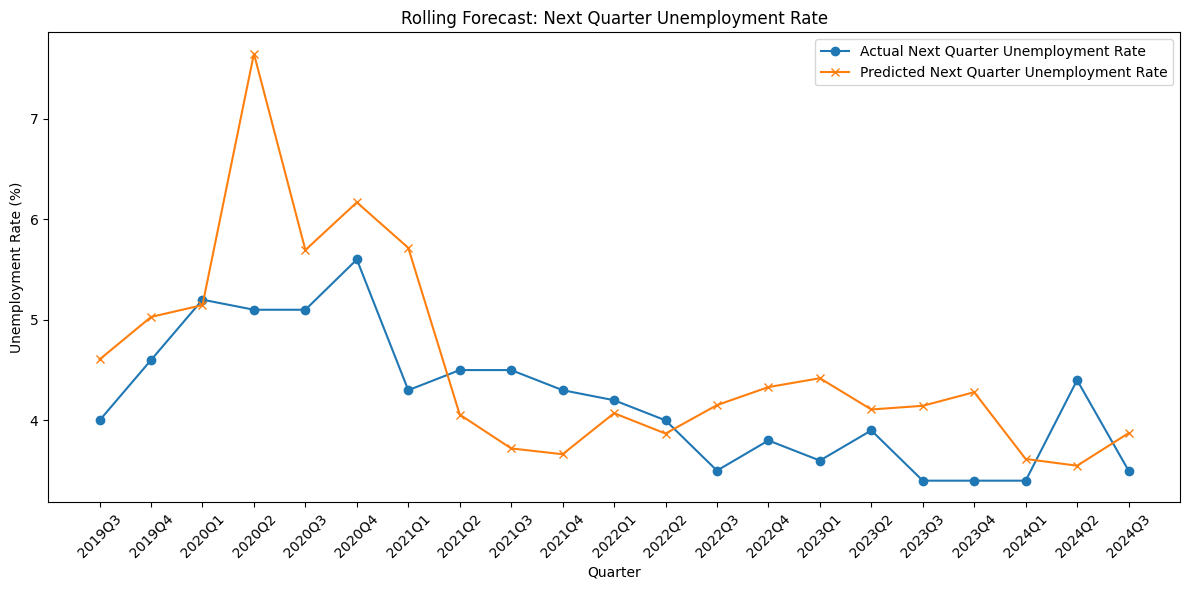

In [25]:
import pandas as pd
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

file_path = "podatki/stopnja brezposelnosti.xlsx"
df_raw = pd.read_excel(file_path, header=None)
quarters = df_raw.iloc[3, 3:].values
unemployment_rates = df_raw.iloc[4, 3:].values

unemployment_df = pd.DataFrame({
    "Cetrtletje": quarters,
    "Unemployment Rate (%)": unemployment_rates
})

print(unemployment_df.head())


file_path = "podatki/prosta delovna mesta.xlsx"
df_raw = pd.read_excel(file_path, header=None)
quarters = df_raw.iloc[2, 2:].values
unemployment_rates = df_raw.iloc[3, 2:].values

prosta_df = pd.DataFrame({
    "Cetrtletje": quarters,
    "Prosta delovna mesta (%)": unemployment_rates
})

print(prosta_df.head())


df = pd.read_excel('podatki/inflacija.xlsx', header=None, skiprows=3, usecols=[0,1], names=['Mesec', 'Vrednost'])

def parse_month(x):
    x = str(x)
    x = x.replace('M','-')
    try:
        return pd.to_datetime(x, format='%Y-%m')
    except:
        return pd.NaT

df['Datum'] = df['Mesec'].apply(parse_month)

df['Cetrtletje'] = df['Datum'].dt.to_period('Q')

cetrtletni_sestevek = df.groupby('Cetrtletje')['Vrednost'].mean().reset_index()

cetrtletni_sestevek['Vrednost'] = cetrtletni_sestevek['Vrednost'] - 100

cetrtletni_sestevek['Vrednost'] = cetrtletni_sestevek['Vrednost'].round(1)

print(cetrtletni_sestevek)


df = pd.read_excel('podatki/bruto.xlsx', header=None, skiprows=3, usecols=[0,1], names=['Mesec', 'Vrednost'])

df['Datum'] = df['Mesec'].apply(parse_month)

df['Cetrtletje'] = df['Datum'].dt.to_period('Q')

bruto = df.groupby('Cetrtletje')['Vrednost'].mean().reset_index()

bruto['Vrednost'] = bruto['Vrednost'].round(2)

print(bruto)


file_path = "podatki/bdp.xlsx"
df_raw = pd.read_excel(file_path, header=None)
quarters = df_raw.iloc[4, 1:].values
unemployment_rates = df_raw.iloc[5, 1:].values

bdp_df = pd.DataFrame({
    "Cetrtletje": quarters,
    "BDP rast (%)": unemployment_rates
})

print(bdp_df.head())


file_path = "podatki/akitnvo prebivalstvo.xlsx"
df_raw = pd.read_excel(file_path, header=None)
quarters = df_raw.iloc[2, 2:].values
unemployment_rates = df_raw.iloc[4, 2:].values

aktivno_df = pd.DataFrame({
    "Quarter": quarters,
    "Aktivno prebivalstvo (%)": unemployment_rates
})

aktivno_df['Quarter'] = aktivno_df['Quarter'].apply(parse_month)

aktivno_df['Cetrtletje'] = aktivno_df['Quarter'].dt.to_period('Q')

aktivno1_df = aktivno_df.groupby('Cetrtletje')['Aktivno prebivalstvo (%)'].mean().reset_index()

aktivno1_df['Aktivno prebivalstvo (%)'] = aktivno1_df['Aktivno prebivalstvo (%)'].round().astype(int)

print(aktivno1_df.head())


cetrtletni_sestevek = cetrtletni_sestevek.rename(columns={'Vrednost': 'Inflacija (%)'})
bruto = bruto.rename(columns={'Vrednost': 'Bruto plača (€)'})

for df in [unemployment_df, prosta_df, bdp_df]:
    df['Cetrtletje'] = pd.PeriodIndex(df['Cetrtletje'], freq='Q')


dfs = [unemployment_df, cetrtletni_sestevek, bruto, aktivno1_df, prosta_df, bdp_df]

df_merged = reduce(lambda left, right: pd.merge(left, right, on='Cetrtletje', how='inner'), dfs)

df_merged = df_merged.sort_values(by='Cetrtletje').reset_index(drop=True)

print(df_merged.head())




df_rolling = df_merged.copy()
df_rolling["Unemployment Next Quarter (%)"] = df_rolling["Unemployment Rate (%)"].shift(-1)
df_rolling = df_rolling.dropna().reset_index(drop=True)

X = df_rolling.drop(columns=["Unemployment Rate (%)", "Cetrtletje", "Unemployment Next Quarter (%)"])
y = df_rolling["Unemployment Next Quarter (%)"]
quarters = df_rolling["Cetrtletje"].astype(str)

split_index = int(len(df_rolling) * 0.3)

X_train = X.iloc[split_index:]
y_train = y.iloc[split_index:]

X_test = X.iloc[:split_index]
y_test = y.iloc[:split_index]
test_quarters = quarters.iloc[:split_index]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
actuals = y_test
pred_quarters = test_quarters

rmse = sqrt(mean_squared_error(actuals, predictions))
r2 = r2_score(actuals, predictions)
print(f'Prediction for Early Period (2008–2013) RMSE: {rmse:.3f}')
print(f'Prediction for Early Period (2008–2013) R^2: {r2:.3f}')

plt.figure(figsize=(12,6))
plt.plot(pred_quarters, actuals, label='Actual Next Quarter Unemployment Rate', marker='o')
plt.plot(pred_quarters, predictions, label='Predicted Next Quarter Unemployment Rate', marker='x')
plt.xlabel('Quarter')
plt.ylabel('Unemployment Rate (%)')
plt.title('Forecast of Unemployment (2008–2013) using 2013–2024 data')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()





n = len(df_rolling)
index_2013 = int(n * 0.3)
index_2019 = int(n * 0.7)

X_train = pd.concat([X.iloc[:index_2013], X.iloc[index_2019:]], ignore_index=True)
y_train = pd.concat([y.iloc[:index_2013], y.iloc[index_2019:]], ignore_index=True)

X_test = X.iloc[index_2013:index_2019]
y_test = y.iloc[index_2013:index_2019]
test_quarters = quarters.iloc[index_2013:index_2019]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
actuals = y_test
pred_quarters = test_quarters

rmse = sqrt(mean_squared_error(actuals, predictions))
r2 = r2_score(actuals, predictions)
print(f'Prediction for Middle Period (2013–2019) RMSE: {rmse:.3f}')
print(f'Prediction for Middle Period (2013–2019) R^2: {r2:.3f}')

plt.figure(figsize=(12,6))
plt.plot(pred_quarters, actuals, label='Actual Next Quarter Unemployment Rate', marker='o')
plt.plot(pred_quarters, predictions, label='Predicted Next Quarter Unemployment Rate', marker='x')
plt.xlabel('Quarter')
plt.ylabel('Unemployment Rate (%)')
plt.title('Forecast of Unemployment (2013–2019) using 2008–2013 and 2019–2024 data')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




initial_train_size = int(len(df_rolling) * 0.7)

predictions = []
actuals = []
pred_quarters = []

for i in range(initial_train_size, len(df_rolling)):
    X_train = X.iloc[:i]
    y_train = y.iloc[:i]

    X_test = X.iloc[i:i+1]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)[0]
    y_true = y.iloc[i]

    predictions.append(y_pred)
    actuals.append(y_true)
    pred_quarters.append(quarters.iloc[i])

rmse = sqrt(mean_squared_error(actuals, predictions))
r2 = r2_score(actuals, predictions)
print(f'Rolling Forecast RMSE: {rmse:.3f}')
print(f'Rolling Forecast R^2: {r2:.3f}')

plt.figure(figsize=(12,6))
plt.plot(pred_quarters, actuals, label='Actual Next Quarter Unemployment Rate', marker='o')
plt.plot(pred_quarters, predictions, label='Predicted Next Quarter Unemployment Rate', marker='x')
plt.xlabel('Quarter')
plt.ylabel('Unemployment Rate (%)')
plt.title('Rolling Forecast: Next Quarter Unemployment Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()